In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [0]:
n_pts = 500

#factor, nos dice cuál es la proporción relativa de los dos círculos generados
X,y = datasets.make_circles(n_samples=n_pts, noise=0.1,random_state=42, factor= 0.2)

X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y.reshape(500,1))

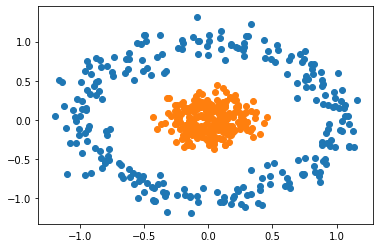

In [0]:
def plot_points():
  plt.scatter(X[y==0,0], X[y==0,1])
  plt.scatter(X[y==1,0], X[y==1,1])

plot_points()

In [0]:
class Model(nn.Module):
  
  def __init__(self, input_size, hidden1_size, output_size):
    super().__init__()
    self.epochs = 500
    self.losses = []
    self.linear1 = nn.Linear(input_size, hidden1_size)
    self.linear2 = nn.Linear(hidden1_size, output_size)

  #Esta función tocó ubicarla fuera del __init__
  #dado a que ya requiere tener el modelo creado 
  #para configurar el optimizador (model.parameters())
  def config_optim(self, criterion, optimizer):
    self.criterion = criterion
    self.optimizer = optimizer

  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  #Esta adecuación es propia, respecto al curso de Udemy.
  #Se me hizo más facil tener todo centralizado en una misma clase de Python.
  def train(self, X, y):
    for i in range(self.epochs):
      y_pred = self.forward(X)
      loss = self.criterion(y_pred, y)
      print("Epoch: ", i, " Loss: ", loss.item())
      self.losses.append(loss.item())
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

  def predict(self, x):
    p = self.forward(x)
    return 1 if p >= 0.5 else 0

  def plot_losses(self):
    plt.plot(range(self.epochs), self.losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

  def plot_decision_boundary(self, X, y):
    x_span = np.linspace(min(X[:,0]), max(X[:,0]))
    y_span = np.linspace(min(X[:,1]), max(X[:,1]))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = self.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)


In [0]:
torch.manual_seed(42)
#Red neuronal con 2 neuronas de entrada
# 4 neuronas oculas
# 1 posible salida
model = Model(2,4,1)
model.config_optim(nn.BCELoss(), torch.optim.Adam(model.parameters(), lr=0.1))
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153]], requires_grad=True), Parameter containing:
tensor([ 0.6233, -0.5188,  0.6146,  0.1323], requires_grad=True), Parameter containing:
tensor([[ 0.3694,  0.0677,  0.2411, -0.0706]], requires_grad=True), Parameter containing:
tensor([0.3854], requires_grad=True)]


In [0]:
model.train(X_tensor, y_tensor)

Epoch:  0  Loss:  0.7646310329437256
Epoch:  1  Loss:  0.7158862352371216
Epoch:  2  Loss:  0.6944546103477478
Epoch:  3  Loss:  0.695095956325531
Epoch:  4  Loss:  0.7051690816879272
Epoch:  5  Loss:  0.711551308631897
Epoch:  6  Loss:  0.7106183767318726
Epoch:  7  Loss:  0.7049568891525269
Epoch:  8  Loss:  0.6982806324958801
Epoch:  9  Loss:  0.6932644844055176
Epoch:  10  Loss:  0.691024661064148
Epoch:  11  Loss:  0.6912779211997986
Epoch:  12  Loss:  0.69286048412323
Epoch:  13  Loss:  0.6943929195404053
Epoch:  14  Loss:  0.6948368549346924
Epoch:  15  Loss:  0.6937655210494995
Epoch:  16  Loss:  0.6913344264030457
Epoch:  17  Loss:  0.6880686283111572
Epoch:  18  Loss:  0.6846089363098145
Epoch:  19  Loss:  0.6814767122268677
Epoch:  20  Loss:  0.6789025068283081
Epoch:  21  Loss:  0.6767461895942688
Epoch:  22  Loss:  0.6745638847351074
Epoch:  23  Loss:  0.6718072891235352
Epoch:  24  Loss:  0.6680718064308167
Epoch:  25  Loss:  0.6632356643676758
Epoch:  26  Loss:  0.657450

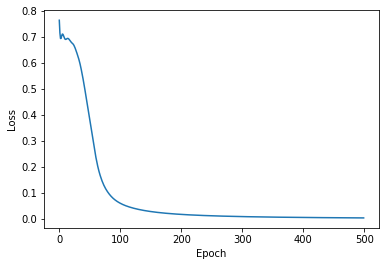

In [0]:
model.plot_losses()

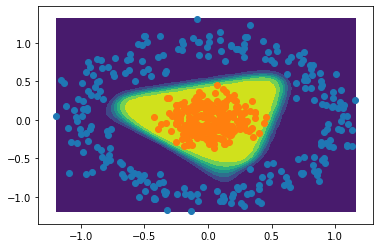

In [0]:
model.plot_decision_boundary(X, y)
plot_points()